In [114]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import linear_model
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import re
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Import Data into Dataframes

In [4]:
set_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/sets.csv")
card_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/cards.csv")

C:\Users\thoma\AppData\Local\Temp\ipykernel_19080\2323603810.py:2: DtypeWarning: Columns (12,16,19,40,51) have mixed types. Specify dtype option on import or set low_memory=False.
  card_info = pd.read_csv("C:/Users/thoma/Desktop/Magic Project/data/AllPrintingsCSVFiles/cards.csv")


In [7]:
set_info.columns

Index(['index', 'id', 'baseSetSize', 'block', 'booster', 'code', 'isFoilOnly',
       'isForeignOnly', 'isNonFoilOnly', 'isOnlineOnly', 'isPartialPreview',
       'keyruneCode', 'mcmId', 'mcmIdExtras', 'mcmName', 'mtgoCode', 'name',
       'parentCode', 'releaseDate', 'tcgplayerGroupId', 'totalSetSize',
       'type'],
      dtype='object')

In [6]:
card_info.columns

Index(['index', 'id', 'artist', 'asciiName', 'availability', 'borderColor',
       'cardKingdomFoilId', 'cardKingdomId', 'colorIdentity', 'colorIndicator',
       'colors', 'convertedManaCost', 'duelDeck', 'edhrecRank',
       'faceConvertedManaCost', 'faceName', 'flavorName', 'flavorText',
       'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit',
       'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative',
       'isFullArt', 'isOnlineOnly', 'isOversized', 'isPromo', 'isReprint',
       'isReserved', 'isStarter', 'isStorySpotlight', 'isTextless',
       'isTimeshifted', 'keywords', 'layout', 'leadershipSkills', 'life',
       'loyalty', 'manaCost', 'mcmId', 'mcmMetaId', 'mtgArenaId',
       'mtgjsonV4Id', 'mtgoFoilId', 'mtgoId', 'multiverseId', 'name', 'number',
       'originalReleaseDate', 'originalText', 'originalType', 'otherFaceIds',
       'power', 'printings', 'promoTypes', 'purchaseUrls', 'rarity',
       'scryfallId', 'scryfallIllustrationId', 'scryfa

These two filters removed all reprints and online cards

In [10]:
not_reprint = card_info.loc[card_info['isReprint'] == 0]

In [12]:
paper_only = not_reprint.loc[not_reprint['isOnlineOnly'] == 0]

In [24]:
top_edh = paper_only[paper_only['edhrecRank'] < 2000].sort_values('edhrecRank')

In [59]:
colors = {"R":"red","B":"black","W":"yellow","U":"blue","G":"green"}

In [61]:
top_edh.groupby('colors').count().loc[['B','R','U','W','G']]

,index,id,artist,asciiName,availability,borderColor,cardKingdomFoilId,cardKingdomId,colorIdentity,colorIndicator,...,subtypes,supertypes,tcgplayerProductId,text,toughness,type,types,uuid,variations,watermark
colors,,,,,,,,,,,,,,,,,,,,,
B,232,232,232,0,232,232,197,228,232,2,...,124,45,232,232,108,232,232,232,22,24
R,171,171,171,0,171,171,139,171,171,1,...,86,31,171,171,77,171,171,171,14,10
U,287,287,287,0,287,287,245,285,287,2,...,121,55,287,287,89,287,287,287,48,25
W,188,188,188,0,188,188,170,188,188,0,...,95,35,188,188,85,188,188,188,18,16
G,317,317,317,0,317,317,265,313,317,2,...,196,47,317,317,166,317,317,317,43,27


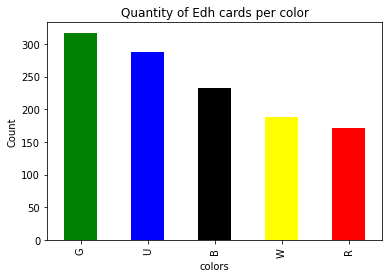

In [72]:
title_graph = 'Quantity of Edh cards per color'
top_edh.groupby('colors').count().loc[['B','R','U','W','G']].sort_values('index',ascending = False).plot.bar( y = 'index', ylabel = 'Count',title = title_graph, legend = False , color = ['green','blue','black','yellow','red']);

As we can see here green and blue dominate the top 2000 cards in edh according to Edhrec. (Keeping in mind that this data is about a year old). I think its a bit suprising how white pulls ahead of red but given that red is all about burn and aggression it makes sense that a format that values politics and playing along wouldnt have a ton of red cards being run in everyones decks.

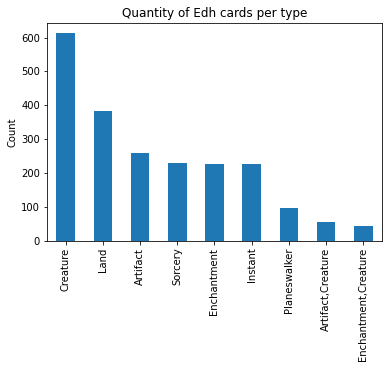

In [87]:
title_graph = 'Quantity of Edh cards per type'
top_edh.groupby('types').count().sort_values('index',ascending = False).loc[lambda x: x['index'] > 10].plot.bar(legend = False,ylabel = 'Count',title = title_graph,y='index',xlabel='');

The way these types order themselves is suprising close to my own personal experience. Commander unsuprisingly is dominated by creatures. Lands arent all that suprising though as every deck needs lands.

In [92]:
set_counts = top_edh.groupby('setCode').count().sort_values('index',ascending = False)

In [148]:
sets_sorted_date = pd.merge(set_counts,set_info,left_index = True, right_on = 'code').sort_values('releaseDate')

In [149]:
sets_sorted_date

,index_x,id_x,artist,asciiName,availability,borderColor,cardKingdomFoilId,cardKingdomId,colorIdentity,colorIndicator,...,mcmId_y,mcmIdExtras,mcmName,mtgoCode,name_y,parentCode,releaseDate,tcgplayerGroupId,totalSetSize,type_y
197,38,38,38,0,38,38,0,38,30,0,...,NaN,NaN,NaN,NaN,Limited Edition Alpha,NaN,1993-08-05,7.0,295,core
198,1,1,1,0,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,Limited Edition Beta,NaN,1993-10-04,17.0,302,core
25,1,1,1,0,1,1,0,1,0,0,...,4.0,NaN,Arabian Nights,NaN,Arabian Nights,NaN,1993-12-17,11.0,92,expansion
27,19,19,19,0,19,19,0,19,0,0,...,5.0,NaN,Antiquities,NaN,Antiquities,NaN,1994-03-04,8.0,101,expansion
199,7,7,7,0,7,7,0,7,7,0,...,7.0,NaN,Legends,NaN,Legends,NaN,1994-06-01,65.0,310,expansion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,4,4,4,0,4,4,0,4,4,0,...,NaN,NaN,NaN,C20,Commander 2020,NaN,2020-04-17,2634.0,322,commander
166,31,31,31,0,31,31,31,31,27,0,...,2819.0,3113.0,Ikoria: Lair of Behemoths,IKO,Ikoria: Lair of Behemoths,NaN,2020-04-24,2603.0,388,expansion
210,28,28,28,0,28,28,28,28,26,0,...,3048.0,NaN,Core 2021,M21,Core Set 2021,NaN,2020-07-03,2653.0,397,core
552,27,27,27,0,27,27,19,19,25,0,...,3404.0,3474.0,Zendikar Rising,ZNR,Zendikar Rising,NaN,2020-09-25,2648.0,392,expansion


In [153]:
DateFormatter.datestr2num(sets_sorted_date['releaseDate'])

AttributeError: type object 'DateFormatter' has no attribute 'datestr2num'

TypeError: Axis.set_major_locator() missing 1 required positional argument: 'locator'

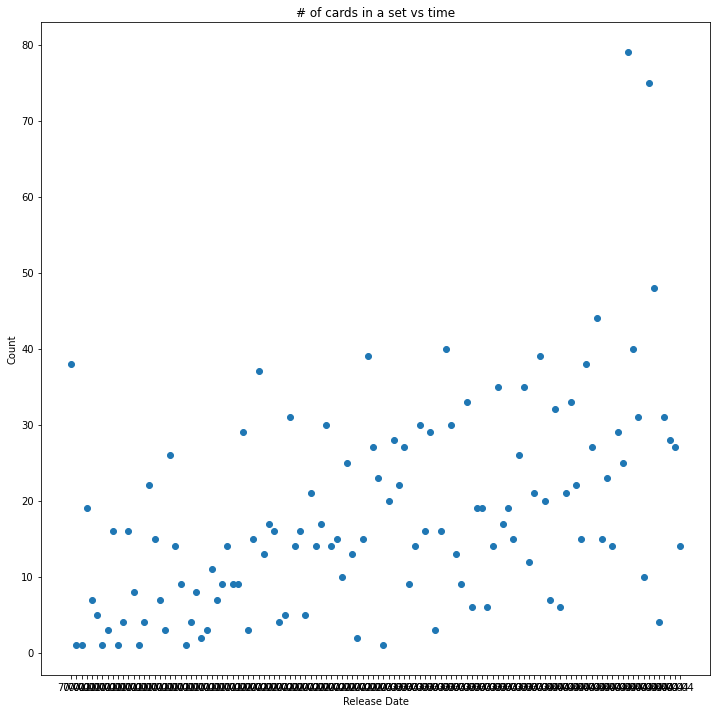

In [151]:
fig, ax1 = plt.subplots(figsize = (12,12))
date_form = DateFormatter("%y-%m")
ax1.scatter(sets_sorted_date['releaseDate'],sets_sorted_date['index_x'])
ax1.set(xlabel = 'Release Date', ylabel = 'Count', title = '# of cards in a set vs time')
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.YearLocator())


In [ ]:
D